# Movie Trend Analysis Using IMDb and Rotten Tomatoes Data
## Problem Statement
Data-driven decisions on movie productions, marketing strategies, and audience development have highly influenced film production. The two most commonly used platforms for user and critic ratings of movies are IMDb and Rotten Tomatoes, respectively.
This project aims to analyze the trends in movie ratings from the different platforms they were released on and to identify key factors determining movie success. We do this by answering important questions like:

- What is the pattern of user and critic ratings with respect to audience and critical preferences?
- How do ratings change over time regarding genre, budget, and release platform, such as Netflix or theaters?
By understanding such trends, our project hopes to shed light on how stakeholders in the film industry-production companies and streaming platforms-can make use of this data to inform decisions.

## Contribution

The trend analysis in movies on both IMDb and Rotten Tomatoes will help in ascertaining which aspect drives audience and critical reception. This can be used by producers to predict the success of a movie and help inform choices relating to how marketing and casting is done and also on the production budget. Knowing the divergence between critics and audience opinion creates the right way to create contents that target variable portions of movie-goers.


## Hypothesis Questions
### Team Mate 1: Yasaswi Raj Madari (5060881)
1. **How do the genres change over time based on IMDb ratings?**
   - *This question seeks to identify trends in genre popularity and how ratings vary over the years.*

2. **Which genre has been consistent among audiences?**
   - *This question aims to find out if certain genres receive a uniform level of praise from audience members over time.*

### Team Mate 2:
3. **What is the relationship between a movie's budget and its IMDb rating? Do higher-budget movies tend to receive higher ratings?**
   - *This question investigates the potential correlation between a movie's production budget and its success, as measured by IMDb ratings.*

4. **How do audience scores on Rotten Tomatoes differ across various genres? Is there a genre that consistently performs better?**
   - *This will reveal which genres are most favored by audiences and help understand their preferences.*

### Team Mate 3:
5. **What factors contribute to the variance between IMDb user ratings and Rotten Tomatoes critic scores for movies released in the last decade?**
   - *This question aims to explore the differences in how users and critics rate movies, uncovering potential biases or patterns in their assessments.*

6. **How do the average ratings for movies change with the years since release? Are newer movies rated more harshly than older films?**
   - *This will help identify any potential bias in rating based on how long a movie has been available.*

### Team Mate 4:
7. **What trends can be observed in the average IMDb and Rotten Tomatoes ratings of award-winning films compared to non-award-winning films?**
   - *This question seeks to find out if award-winning films generally receive higher ratings from users and critics.*

8. **Are there significant differences in audience engagement (measured by ratings) for movies across different platforms (e.g., Netflix, theaters, etc.)?**
   - *This will help understand how release platforms impact the audience reception and critical success of a movie.*


## Data Retrival
We retrive the data from the imdb provided data sets using pd read csv and scrape the data using beautifulsoup for rotten tomatoes data.

Below is the code we used to scrape the data 
```python
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd

def format_movie_title_for_url(title):
    title = title.replace('&', 'and') 
    title = re.sub(r'[^a-zA-Z0-9\s]', '', title)
    title = title.replace(' ', '_').lower() 
    return title

def scrape_voter_count(movie_title):
    base_url = "https://www.rottentomatoes.com/m/"
    formatted_title = format_movie_title_for_url(movie_title)
    url = base_url + formatted_title
    headers = {'User-Agent': 'Mozilla/5.0'}

    try:
        response = requests.get(url, headers=headers)
        if response.status_code != 200:
            print(f"Error fetching {movie_title}: Status code {response.status_code}")
            return None

        soup = BeautifulSoup(response.text, 'html.parser')

        critics_review_link = soup.find('rt-link', {'slot': 'criticsReviews'})
        if critics_review_link:
            voter_count_text = critics_review_link.text.strip()
            voter_count = re.search(r'\d+', voter_count_text)
            if voter_count:
                voter_count = voter_count.group()
                return voter_count

        print(f"No valid voter count found for {movie_title}")
        return None

    except Exception as e:
        print(f"Error scraping {movie_title}: {e}")
        return None

final_dataset_cleaned['voterCount'] = None

valid_rows = final_dataset_cleaned.loc[
    final_dataset_cleaned['criticsRating'].notna() &
    (final_dataset_cleaned['criticsRating'] != 'None') &
    (final_dataset_cleaned['criticsRating'] != '')
]

unsuccessful_count = 0
for index, row in valid_rows.iterrows():
    movie_title = row['originalTitle']
    voter_count = scrape_voter_count(movie_title)

    if voter_count is not None:
        final_dataset_cleaned.at[index, 'voterCount'] = voter_count
    else:
        unsuccessful_count += 1

print(f"Number of unsuccessful web scraping attempts: {unsuccessful_count}")

print(final_dataset_cleaned[['originalTitle', 'criticsRating', 'voterCount']].head(20))
```
```python
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd

def format_movie_title_for_url(title):
    title = title.replace('&', 'and')
    title = re.sub(r'[^a-zA-Z0-9\s]', '', title)
    title = title.replace(' ', '_').lower()
    return title

def scrape_rotten_tomatoes(movie_title):
    base_url = "https://www.rottentomatoes.com/m/"
    formatted_title = format_movie_title_for_url(movie_title)
    url = base_url + formatted_title
    headers = {'User-Agent': 'Mozilla/5.0'}

    try:
        response = requests.get(url, headers=headers)
        if response.status_code == 404:
            print(f"Error fetching {movie_title}: Status code 404 (Page not found)")
            return None, None
        elif response.status_code != 200:
            print(f"Error fetching {movie_title}: Status code {response.status_code}")
            return None, None

        soup = BeautifulSoup(response.text, 'html.parser')

        critic_score_button = soup.find('rt-button', {'slot': 'criticsScore'})
        critic_score = None
        if critic_score_button:
            critic_score = critic_score_button.get_text(strip=True)

        audience_score_button = soup.find('rt-button', {'slot': 'audienceScore'})
        audience_score = None
        if audience_score_button:
            audience_score = audience_score_button.get_text(strip=True)

        if not critic_score and not audience_score:
            print(f"No valid score found for {movie_title}")
            return None, None

        return critic_score, audience_score

    except Exception as e:
        print(f"Error scraping {movie_title}: {e}")
        return None, None

final_dataset_cleaned['criticsRating'] = None
final_dataset_cleaned['audienceRating'] = None

movies_after_2010 = final_dataset_cleaned[final_dataset_cleaned['startYear'] > '2010']

unsuccessful_count = 0
for index, row in movies_after_2010.iterrows():
    movie_title = row['originalTitle']
    critics_rating, audience_rating = scrape_rotten_tomatoes(movie_title)

    if critics_rating is not None and audience_rating is not None:
        final_dataset_cleaned.at[index, 'criticsRating'] = critics_rating
        final_dataset_cleaned.at[index, 'audienceRating'] = audience_rating
    else:
        unsuccessful_count += 1

print(f"Number of unsuccessful web scraping attempts: {unsuccessful_count}")

print(final_dataset_cleaned.head(20))

final_dataset_cleaned.to_csv('updated_dataset_with_rt_ratings.csv', index=False)
```

In [21]:
import pandas as pd

In [50]:
# Load the datasets
akas = pd.read_csv('https://datasets.imdbws.com/title.akas.tsv.gz', sep='\t', compression='gzip',low_memory= False)
titles = pd.read_csv('https://datasets.imdbws.com/title.basics.tsv.gz', sep='\t', compression='gzip', low_memory= False)
crew = pd.read_csv('https://datasets.imdbws.com/title.crew.tsv.gz', sep='\t', compression='gzip', low_memory= False)
ratings = pd.read_csv('https://datasets.imdbws.com/title.ratings.tsv.gz', sep='\t', compression='gzip', low_memory= False)
names = pd.read_csv('https://datasets.imdbws.com/name.basics.tsv.gz', sep='\t', compression='gzip', low_memory= False)

titles_filtered = titles[(titles['startYear'] > '2010') & 
                         (titles['titleType'] == 'movie')]

english_movies = titles_filtered[titles_filtered['originalTitle'].str.contains('[a-zA-Z]', regex=True, na=False)]

akas_filtered = akas[akas['region'].isin(['UK', 'US'])]
akas_filtered = akas_filtered[['titleId', 'region', 'isOriginalTitle']]

english_movies = english_movies.merge(akas_filtered, left_on='tconst', right_on='titleId', how='left')

merged_data = english_movies.merge(crew, left_on='tconst', right_on='tconst', how='left')
merged_data = merged_data.merge(ratings, left_on='tconst', right_on='tconst', how='left')

merged_data = merged_data.explode('directors')
merged_data = merged_data.merge(names, left_on='directors', right_on='nconst', how='left')

final_dataset = merged_data[['tconst', 'originalTitle', 'startYear', 'genres', 'runtimeMinutes', 
                             'primaryName', 'averageRating', 'numVotes', 'isOriginalTitle', 'isAdult', 'region']]
final_dataset.rename(columns={'primaryName': 'director'}, inplace=True)

final_dataset['runtimeMinutes'] = pd.to_numeric(final_dataset['runtimeMinutes'], errors='coerce').fillna(0).astype(int)

final_dataset_cleaned = final_dataset.dropna()

print(final_dataset_cleaned.head())


c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\MYASAS~1\AppData\Local\Temp/ipykernel_23656/1126361636.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset['runtimeMinutes'] = pd.to_numeric(final_dataset['runtimeMinutes'], errors='coerce').fillna(0).astype(int)


       tconst               originalTitle startYear  \
4   tt0069049  The Other Side of the Wind      2018   
16  tt0112502                     Bigfoot      2017   
17  tt0116991         Mariette in Ecstasy      2019   
18  tt0120589                Predestinado      2022   
55  tt0137204             Joe Finds Grace      2017   

                        genres  runtimeMinutes           director  \
4                        Drama             122       Orson Welles   
16             Horror,Thriller               0           Mc Jones   
17                       Drama             101        John Bailey   
18             Biography,Drama             108  Gustavo Fernández   
55  Adventure,Animation,Comedy              83   Anthony Harrison   

    averageRating  numVotes  isOriginalTitle isAdult region  
4             6.7    8160.0              0.0       0     US  
16            4.7      43.0              0.0       0     US  
17            7.1      81.0              0.0       0     US  
18    

In [51]:
final_dataset_cleaned['startYear'] = pd.to_numeric(final_dataset_cleaned['startYear'], errors='coerce')

print(final_dataset_cleaned.head())
print(final_dataset_cleaned.info())
print(final_dataset_cleaned.describe())
year_min = final_dataset_cleaned['startYear'].min()
year_max = final_dataset_cleaned['startYear'].max()

year_range = (year_min, year_max)
print(f"The year range is: {year_range[0]} to {year_range[1]}")

       tconst               originalTitle  startYear  \
4   tt0069049  The Other Side of the Wind     2018.0   
16  tt0112502                     Bigfoot     2017.0   
17  tt0116991         Mariette in Ecstasy     2019.0   
18  tt0120589                Predestinado     2022.0   
55  tt0137204             Joe Finds Grace     2017.0   

                        genres  runtimeMinutes           director  \
4                        Drama             122       Orson Welles   
16             Horror,Thriller               0           Mc Jones   
17                       Drama             101        John Bailey   
18             Biography,Drama             108  Gustavo Fernández   
55  Adventure,Animation,Comedy              83   Anthony Harrison   

    averageRating  numVotes  isOriginalTitle isAdult region  
4             6.7    8160.0              0.0       0     US  
16            4.7      43.0              0.0       0     US  
17            7.1      81.0              0.0       0     US  


C:\Users\MYASAS~1\AppData\Local\Temp/ipykernel_23656/1558372209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset_cleaned['startYear'] = pd.to_numeric(final_dataset_cleaned['startYear'], errors='coerce')


In [87]:
genres_expanded = final_dataset_cleaned.copy()

genres_expanded['genres'] = genres_expanded['genres'].str.split(',')
genres_expanded = genres_expanded.explode('genres')

print(genres_expanded.head())
print(genres_expanded.info())
print(genres_expanded.describe())

print(genres_expanded.isnull().sum())
genre_trends = genres_expanded.groupby(['startYear', 'genres'])['averageRating'].mean().reset_index()

print(genre_trends.head())





       tconst               originalTitle  startYear     genres  \
4   tt0069049  The Other Side of the Wind     2018.0      Drama   
16  tt0112502                     Bigfoot     2017.0     Horror   
16  tt0112502                     Bigfoot     2017.0   Thriller   
17  tt0116991         Mariette in Ecstasy     2019.0      Drama   
18  tt0120589                Predestinado     2022.0  Biography   

    runtimeMinutes           director  averageRating  numVotes  \
4              122       Orson Welles            6.7    8160.0   
16               0           Mc Jones            4.7      43.0   
16               0           Mc Jones            4.7      43.0   
17             101        John Bailey            7.1      81.0   
18             108  Gustavo Fernández            7.2     421.0   

    isOriginalTitle isAdult region  
4               0.0       0     US  
16              0.0       0     US  
16              0.0       0     US  
17              0.0       0     US  
18             

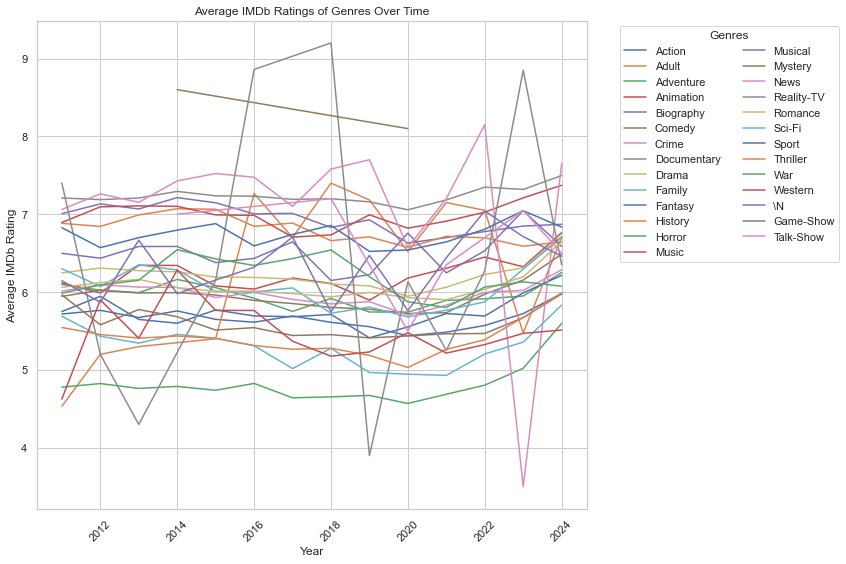

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style='whitegrid')

# Plot the trends for all genres
plt.figure(figsize=(12, 8))  # Adjust the figure size for better visibility
for genre in genre_trends['genres'].unique():
    genre_data = genre_trends[genre_trends['genres'] == genre]
    plt.plot(genre_data['startYear'], genre_data['averageRating'], label=genre)

plt.title('Average IMDb Ratings of Genres Over Time')
plt.xlabel('Year')
plt.ylabel('Average IMDb Rating')

# Adjust the legend so that it doesn't overlap with the plot
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)  # Use ncol to make it multi-column
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [89]:
average_genre_ratings = genres_expanded.groupby('genres')['averageRating'].mean().reset_index()

average_genre_ratings = average_genre_ratings.sort_values(by='averageRating', ascending=False)

print(average_genre_ratings)


         genres  averageRating
11    Game-Show       8.350000
17         News       7.318038
7   Documentary       7.221144
14        Music       6.976494
4     Biography       6.971777
12      History       6.830231
21        Sport       6.736059
18   Reality-TV       6.728571
22    Talk-Show       6.550000
15      Musical       6.495414
1         Adult       6.443750
26           \N       6.416449
24          War       6.212641
8         Drama       6.202293
3     Animation       6.201825
19      Romance       6.056736
9        Family       6.049176
6         Crime       5.964105
2     Adventure       5.947428
5        Comedy       5.937292
10      Fantasy       5.713464
0        Action       5.654895
16      Mystery       5.567256
25      Western       5.451327
23     Thriller       5.399156
20       Sci-Fi       5.287867
13       Horror       4.790641
